# Building an image classifier using the sequential API

Following step-by-step procedure in Chapter 10 of Aurélien Géron's book _Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow_.

In [1]:
from pathlib import Path, PurePath
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import h5py
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Applications/Computation/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import tensorflow
print(f'TensorFlow version: {tensorflow.__version__}')
from tensorflow import keras
print(f'Keras version: {keras.__version__}')

TensorFlow version: 2.0.0
Keras version: 2.2.4-tf


In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

We will be using the _Fashion MNIST data set_, which has fashion image items instead of numbers.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(f'X_train_full.shape: {X_train_full.shape}')
print(f'X_train_full.dtype: {X_train_full.dtype}')

X_train_full.shape: (60000, 28, 28)
X_train_full.dtype: uint8


In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Build model with sequential API

In [8]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]), \
                                 keras.layers.Dense(300, activation="relu"), \
                                 keras.layers.Dense(100, activation="relu"), \
                                 keras.layers.Dense(10, activation="softmax")])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
model.get_layer('dense_2') is hidden1

False

In [13]:
weights, biases = hidden1.get_weights()

### Compiling the model

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [15]:
t0 = time()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
print(f'Time elapsed: {time() - t0:.4f} sec')

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 137us/sample - loss: 0.7027 - accuracy: 0.7717 - val_loss: 0.5073 - val_accuracy: 0.8274
Epoch 2/30
55000/55000 [==============================] - 7s 130us/sample - loss: 0.4880 - accuracy: 0.8292 - val_loss: 0.4441 - val_accuracy: 0.8440
Epoch 3/30
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4424 - accuracy: 0.8453 - val_loss: 0.4309 - val_accuracy: 0.8538
Epoch 4/30
55000/55000 [==============================] - 7s 136us/sample - loss: 0.4164 - accuracy: 0.8552 - val_loss: 0.4029 - val_accuracy: 0.8638
Epoch 5/30
55000/55000 [==============================] - 7s 136us/sample - loss: 0.3961 - accuracy: 0.8616 - val_loss: 0.3934 - val_accuracy: 0.8636
Epoch 6/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.3793 - accuracy: 0.8665 - val_loss: 0.3758 - val_accuracy: 0.8690
Epoch 7/30
55000/55000 [===========================

In [16]:
print(f'Type: {type(history)}')

Type: <class 'tensorflow.python.keras.callbacks.History'>


In [17]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [18]:
df = pd.DataFrame(history.history)
df.tail(10)

,loss,accuracy,val_loss,val_accuracy
20,0.263904,0.904636,0.320117,0.8846
21,0.258436,0.906909,0.296789,0.8920
22,0.254595,0.907782,0.304167,0.8904
23,0.250472,0.909945,0.302599,0.8902
24,0.246072,0.911564,0.302463,0.8916
25,0.241588,0.912727,0.297736,0.8946
26,0.237638,0.914255,0.297180,0.8928
27,0.233773,0.915527,0.306266,0.8886
28,0.230852,0.917364,0.301551,0.8902
29,0.226363,0.919855,0.296893,0.8954


In [19]:
df.shape

(30, 4)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loss          30 non-null     float64
 1   accuracy      30 non-null     float64
 2   val_loss      30 non-null     float64
 3   val_accuracy  30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


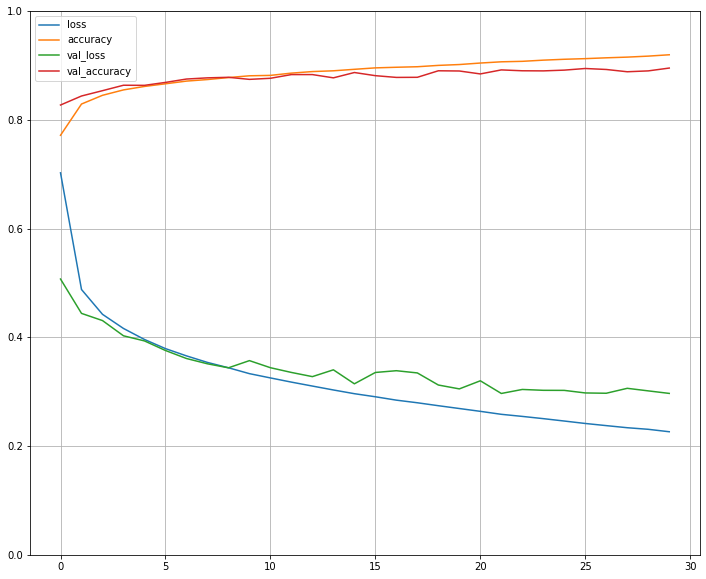

In [21]:
df.plot(figsize=(12, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1);